In [1]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve, precision_score, recall_score, f1_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('../../../eismas/home-data-for-ml-course/train.csv')
test = pd.read_csv('../../../eismas/home-data-for-ml-course/test.csv')


In [3]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.info()

In [5]:
# Get column names where dtype is 'object'
object_columns = train.select_dtypes(include='object').columns.tolist()
print(object_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [6]:
categorical_columns = object_columns

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].fit_transform(test[col])

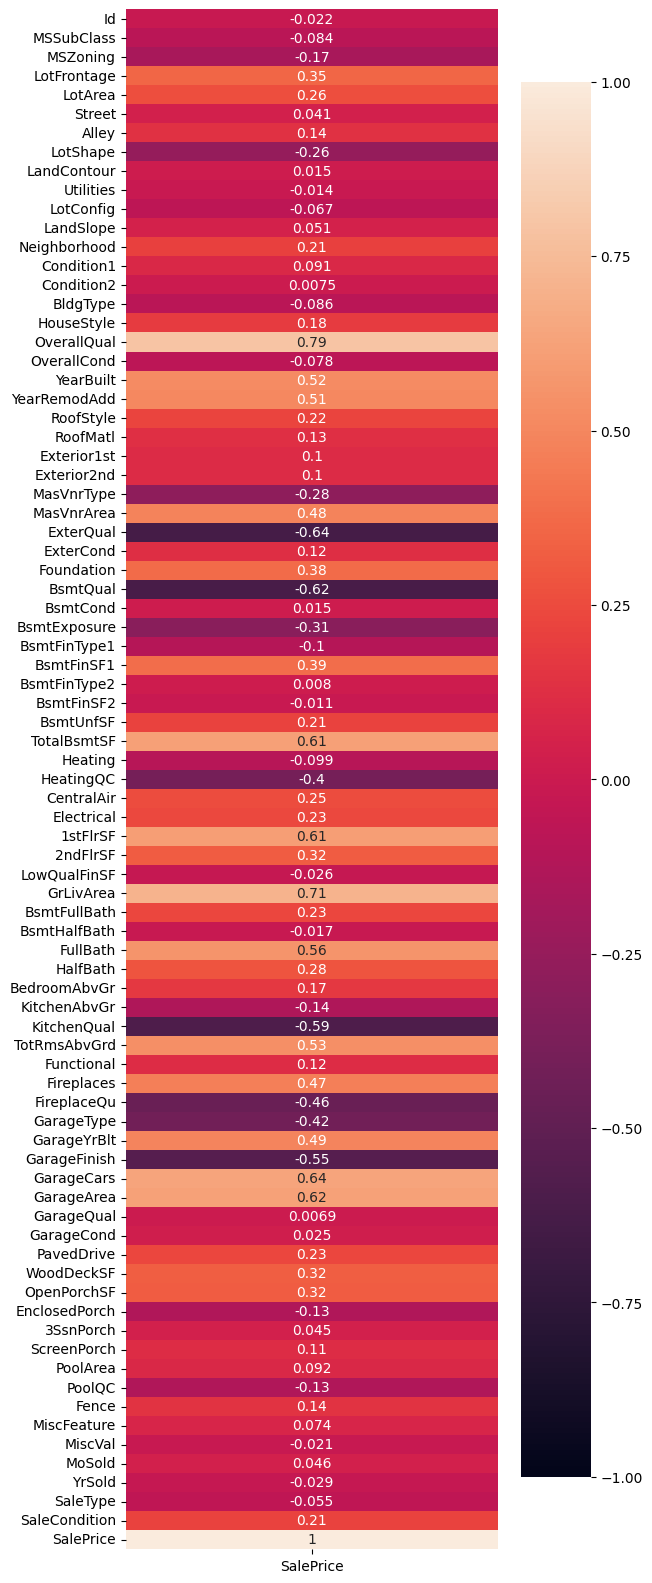

In [7]:
fig, ax = plt.subplots(figsize=(6,20))
sns.heatmap(data=train.corr()['SalePrice'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax)
plt.show()

In [68]:
correlation_scores = train.corr()['SalePrice']
low_correlation_columns = correlation_scores[correlation_scores.abs() < 0.2].index.tolist()
print(low_correlation_columns)

['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType']


In [69]:
train.drop(columns=low_correlation_columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   LotShape       1460 non-null   int64  
 3   Neighborhood   1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   RoofStyle      1460 non-null   int64  
 8   MasVnrType     1460 non-null   int64  
 9   MasVnrArea     1460 non-null   float64
 10  ExterQual      1460 non-null   int64  
 11  Foundation     1460 non-null   int64  
 12  BsmtQual       1460 non-null   int64  
 13  BsmtExposure   1460 non-null   int64  
 14  BsmtFinSF1     1460 non-null   int64  
 15  BsmtUnfSF      1460 non-null   int64  
 16  TotalBsmtSF    1460 non-null   int64  
 17  HeatingQC      1460 non-null   int64  
 18  CentralA

70.04995836802664
70.04995836802665


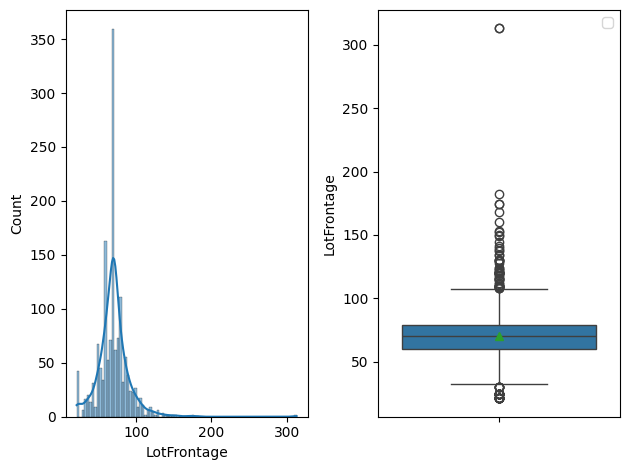

In [23]:
print(train['LotFrontage'].mean())
print(train['LotFrontage'].median())
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(train['LotFrontage'], kde=True, label='LotFrontage', ax=ax1)
sns.boxplot(train['LotFrontage'], showmeans=True, ax=ax2)
# sns.histplot(train['MasVnrArea'], kde=True, label='MasVnrArea')
# sns.histplot(train['GarageYrBlt'], kde=True, label='GarageYrBlt')
plt.tight_layout()
plt.legend()
plt.show()

In [11]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

103.68526170798899
0.0


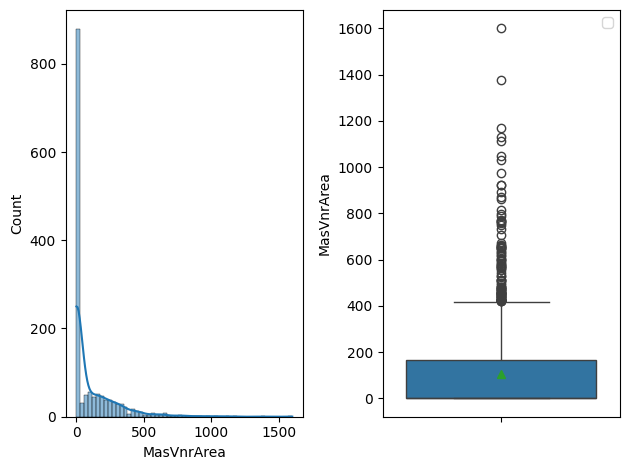

In [12]:
print(train['MasVnrArea'].mean())
print(train['MasVnrArea'].median())
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(train['MasVnrArea'], kde=True, label='MasVnrArea', ax=ax1)
sns.boxplot(train['MasVnrArea'], showmeans=True, ax=ax2)
# sns.histplot(train['MasVnrArea'], kde=True, label='MasVnrArea')
# sns.histplot(train['GarageYrBlt'], kde=True, label='GarageYrBlt')
plt.tight_layout()
plt.legend()
plt.show()

In [13]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())

1978.5061638868744
1980.0


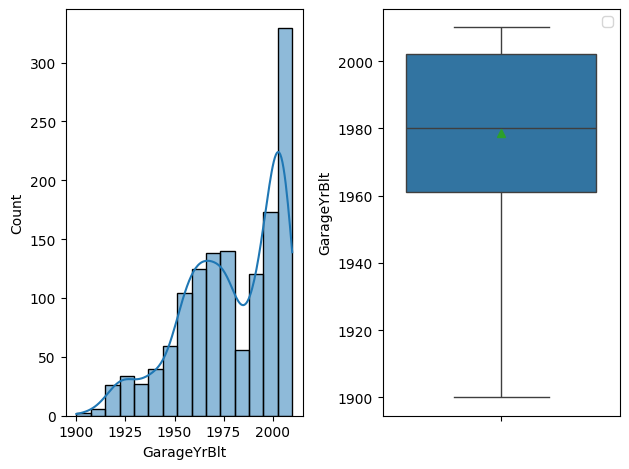

In [14]:
print(train['GarageYrBlt'].mean())
print(train['GarageYrBlt'].median())
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(train['GarageYrBlt'], kde=True, label='GarageYrBlt', ax=ax1)
sns.boxplot(train['GarageYrBlt'], showmeans=True, ax=ax2)
# sns.histplot(train['MasVnrArea'], kde=True, label='MasVnrArea')
# sns.histplot(train['GarageYrBlt'], kde=True, label='GarageYrBlt')
plt.tight_layout()
plt.legend()
plt.show()

In [15]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

In [70]:
# Nustatom X ir y ir splittinam
train_df = train.drop(columns=low_correlation_columns)
# train_df.info()
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice'].values      # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# linear
fit = LinearRegression().fit(X_train, y_train)
y_pred = fit.predict(X_test)
fit_score = fit.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")

r2s = r2_score(y_test, y_pred)
print(f'r2 score: {r2s}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

fit score: 84.27471603144461
Mean Squared Error: 34730.110529549136
r2 score: 0.8427471603144461
Mean absolute error: 22007.01448176047


In [72]:
# forest
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
forest_score = forest.score(X_test, y_test) *100.0
print(f'forest score: {forest_score}')

mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")

r2s = r2_score(y_test, y_pred)
print(f'r2 score: {r2s}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

forest score: 89.39780994679066
Mean Squared Error: 28517.057390044687
r2 score: 0.8939780994679066
Mean absolute error: 17589.294006849315


In [73]:
regressor = DecisionTreeRegressor(random_state=23)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
tree_reg_score = regressor.score(X_test, y_test) *100.0
print(f'fit score: {tree_reg_score}')

mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")
r2s = r2_score(y_test, y_pred)
print(f'r2 score: {r2s}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

fit score: 75.6867772496995
Mean Squared Error: 43184.528438181216
r2 score: 0.756867772496995
Mean absolute error: 27966.078767123287


In [75]:
test_df = test.drop(columns=low_correlation_columns)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1232 non-null   float64
 1   LotArea        1459 non-null   int64  
 2   LotShape       1459 non-null   int64  
 3   Neighborhood   1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   RoofStyle      1459 non-null   int64  
 8   MasVnrType     1459 non-null   int64  
 9   MasVnrArea     1444 non-null   float64
 10  ExterQual      1459 non-null   int64  
 11  Foundation     1459 non-null   int64  
 12  BsmtQual       1459 non-null   int64  
 13  BsmtExposure   1459 non-null   int64  
 14  BsmtFinSF1     1458 non-null   float64
 15  BsmtUnfSF      1458 non-null   float64
 16  TotalBsmtSF    1458 non-null   float64
 17  HeatingQC      1459 non-null   int64  
 18  CentralA

68.58035714285714
67.0


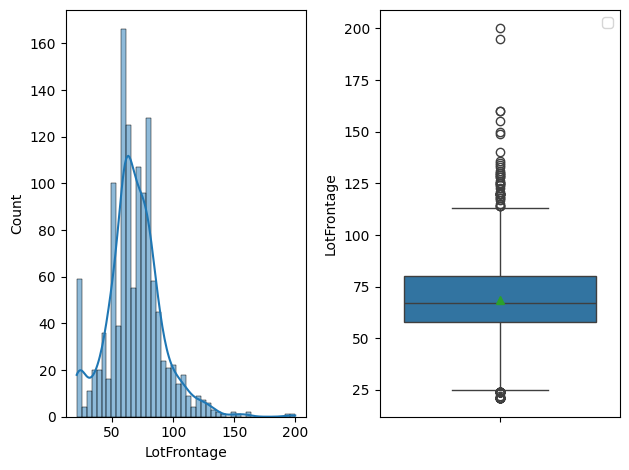

In [76]:
print(test_df['LotFrontage'].mean()) 
print(test_df['LotFrontage'].median())
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(test_df['LotFrontage'], kde=True, label='LotFrontage', ax=ax1)
sns.boxplot(test_df['LotFrontage'], showmeans=True, ax=ax2)
plt.tight_layout()
plt.legend()
plt.show()

In [77]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [ ]:
'MasVnrArea'
'BsmtFinSF1'
'BsmtUnfSF'
'TotalBsmtSF'
'BsmtFullBath'
'GarageYrBlt'
'GarageCars'
'GarageArea'

472.76886145404666
480.0


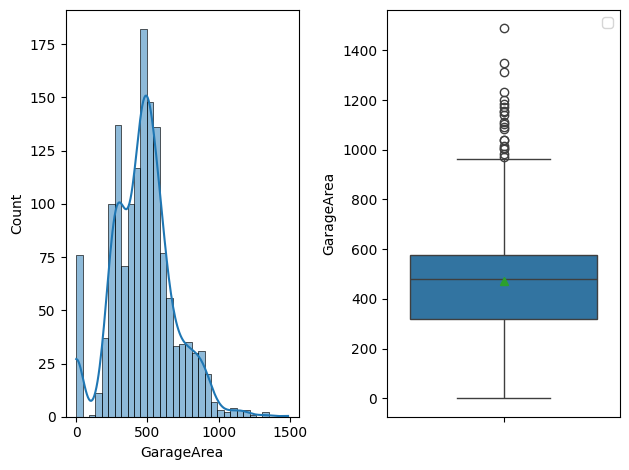

In [85]:
print(test_df['GarageArea'].mean()) 
print(test_df['GarageArea'].median())
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(test_df['GarageArea'], kde=True, label='GarageArea', ax=ax1)
sns.boxplot(test_df['GarageArea'], showmeans=True, ax=ax2)
plt.tight_layout()
plt.legend()
plt.show()

In [86]:
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].median())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].median())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].median())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].median())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median())
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].median())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].median())

In [88]:
# spejimai
test_pred_forest = forest.predict(test_df)

In [89]:
test_pred_forest

array([127267.1 , 155003.34, 178190.03, ..., 151167.75, 117668.5 ,
       223542.14])

In [90]:
test_df['SalePrice'] = test_pred_forest

In [94]:
test_df['Id'] = test['Id']
test_df.head(2)

,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,Id
0,80.0,11622,3,12,5,1961,1961,1,3,0.0,...,1961.0,2,1.0,730.0,2,140,0,4,127267.10,1461
1,81.0,14267,0,12,6,1958,1958,3,1,108.0,...,1958.0,2,1.0,312.0,2,393,36,4,155003.34,1462


In [96]:
df = test_df[['Id', 'SalePrice']]
df.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
# Kaggle score: 16851.32980